# Practice Project 1 : titanic_train.csv

#### importing required libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

#### loading the dataset

In [152]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [153]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [154]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7,C47,C


In [155]:
df.shape

(891, 12)

In [156]:
# there are 891 rows and 12 columns.
# there are both categorical numarical data in dataset. categorical column are 'Pclass','Sex','Embarked'.
# numerical columns are 'Age','Fare','Passengerid'.

In [157]:
# our target variable is 'survived' column. and here we are going to logistic regression as it binary classification.

#### data preparation 

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [159]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [160]:
# we can see that more than 50% data is missing in 'Cabin' column. so we can drop it.

In [161]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [162]:
#there is a high range in column "fare".


#### data visualization

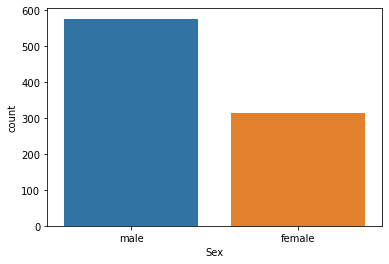

In [163]:
sns.countplot("Sex",data = df)

In [164]:
# there are more male than female.

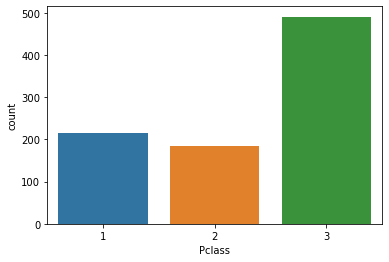

In [165]:
sns.countplot("Pclass", data = df)

In [166]:
#there are more passengers in pclass3.

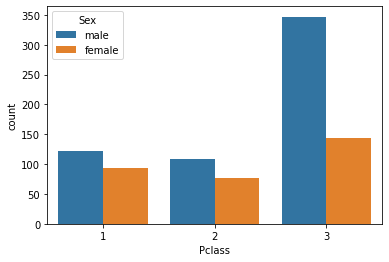

In [167]:
sns.countplot('Pclass',hue = 'Sex',data = df)

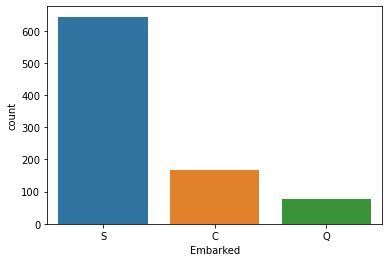

In [168]:
sns.countplot("Embarked",data = df)

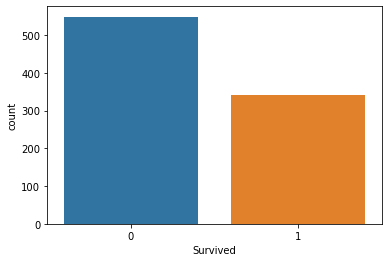

In [169]:
sns.countplot("Survived",data = df)

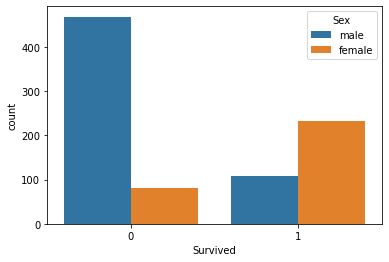

In [170]:
sns.countplot("Survived",hue = 'Sex',data = df)

In [171]:
# mostly males have not survived compared to females

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


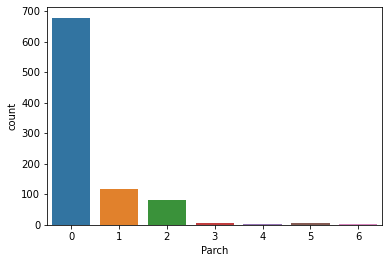

In [172]:
print(df['Parch'].value_counts())
sns.countplot("Parch",data = df)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


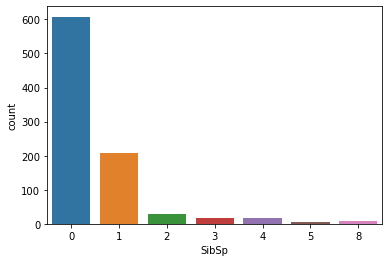

In [173]:
print(df['SibSp'].value_counts())
sns.countplot('SibSp',data = df)

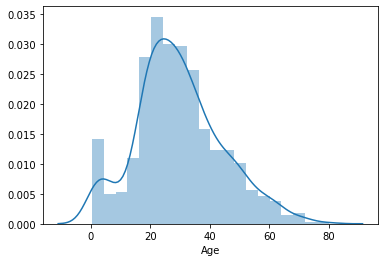

In [174]:
sns.distplot(df["Age"])

In [175]:
#we can drop the passengerid,name,cabin,ticket column from dataset as they do not contribute for target variable.

In [176]:
df = df.drop("PassengerId",axis =1)

In [177]:
df = df.drop("Name",axis =1)

In [178]:
df = df.drop("Cabin",axis =1)

In [179]:
df= df.drop("Ticket",axis =1)
df = df.drop("Embarked",axis =1)

In [180]:
df['Age']= df['Age'].fillna(df['Age'].mean())

In [181]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [182]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex']= le.fit_transform(df['Sex'])

In [183]:
df['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

Survived       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Pclass      AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Sex         AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Age         AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
SibSp       AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Parch       AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Fare        AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
dtype: object

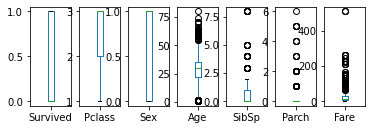

In [184]:
df.plot(kind = 'box',subplots =True,layout= (2,7))

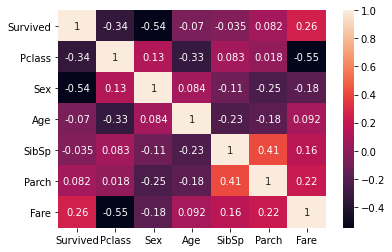

In [185]:
dfcorr = df.corr()
sns.heatmap(dfcorr,annot = True)

In [186]:
x = df.drop("Survived",axis =1)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [187]:
y = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [188]:
print(x.shape)
y.shape

(891, 6)


(891,)

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [191]:
print(x_train.shape)
print(y_train.shape)

(712, 6)
(712,)


In [192]:
print(x_test.shape)
print(y_test.shape)

(179, 6)
(179,)


In [193]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc = dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.770949720670391
[[86 19]
 [22 52]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.73      0.70      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [194]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.6871508379888268
[[83 22]
 [34 40]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       105
           1       0.65      0.54      0.59        74

    accuracy                           0.69       179
   macro avg       0.68      0.67      0.67       179
weighted avg       0.68      0.69      0.68       179



In [195]:
svc= SVC(kernel = "rbf")
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6536312849162011
[[99  6]
 [56 18]]
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.75      0.24      0.37        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.56       179
weighted avg       0.68      0.65      0.60       179



In [196]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8100558659217877
[[92 13]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [202]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
sgd.score(x_train,y_train)
predsgd = sgd.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8100558659217877
[[92 13]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [197]:
from sklearn.model_selection import cross_val_score

dtcscores = cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.68156425 0.78651685 0.81460674 0.75280899 0.80337079]
0.7677735233193145 0.047891136434121004


In [198]:
from sklearn.model_selection import cross_val_score

svcscores = cross_val_score(svc,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.59217877 0.71348315 0.69101124 0.68539326 0.69101124]
0.674615529470843 0.04233274996749585


In [199]:
from sklearn.model_selection import cross_val_score

knnscores = cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.6424581  0.68539326 0.73595506 0.7247191  0.71348315]
0.7004017324712823 0.033493926013326514


In [203]:
parameters = {"max_iter":[500,700,900,110,1200,1300,1400,1500],
             "alpha":[0.0001,0.001,0.01,0.1,1,10,100],
             "penalty": ["elasticnet","l1","l2"]}

In [210]:
from sklearn.model_selection import GridSearchCV
gcv = GridSearchCV(sgd,parameters,cv=15,scoring ='accuracy')  # intializing GCV
gcv.fit(x_train,y_train)
gcv.best_estimator_   #finding best estimator
gcv_pred = gcv.best_estimator_.predict(x_test)  #predicting th value using best estimator found by GridSearchCV
print("Accuracy score: ", accuracy_score(y_test,gcv_pred)*100)

Accuracy score:  74.30167597765363


In [211]:
import joblib
joblib.dump(gcv.best_estimator_,"titanicproject.pkl")

['titanicproject.pkl']